In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
bureau_balance = pd.read_csv(DATASET_DIR / "bureau_balance.csv")
credit_card_balance = pd.read_csv(DATASET_DIR / "credit_card_balance.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [37]:
description.loc[description['Table']=="bureau.csv", "Row":"Special"]

,Row,Description,Special
125,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


Schittmenge zwischen Application Train und Bureau, um die Variable "TARGET" zu ergänzen

In [4]:
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

In [48]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0


In [5]:
# Function to draw a Piechart
def draw_piechart(arguments):
    
    fig, ax = plt.subplots(1,len(arguments))

    try:
    # Handle multiple plots
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
            
    # Handle single plot           
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
        
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    plt.show()

In [6]:
bureau["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [7]:
payback = bureau[bureau["TARGET"] == "Payback"]
default = bureau[bureau["TARGET"] == "Default"]

### Payback

Consumer credit                                 989564
Credit card                                     313591
Car loan                                         22433
Mortgage                                         14827
Microloan                                         7146
Loan for business development                     1615
Another type of loan                               793
Unknown type of loan                               443
Loan for working capital replenishment             329
Real estate loan                                    23
Cash loan (non-earmarked)                           22
Loan for the purchase of equipment                  13
Loan for purchase of shares (margin lending)         4
Interbank credit                                     1
Mobile operator loan                                 1
Name: CREDIT_TYPE, dtype: int64 



### Default

Consumer credit                           80046
Credit card                               30262
Microloan                                  1859
Car loan                                   1324
Mortgage                                    780
Loan for business development               106
Another type of loan                         61
Loan for working capital replenishment       48
Unknown type of loan                         29
Loan for the purchase of equipment            4
Cash loan (non-earmarked)                     1
Name: CREDIT_TYPE, dtype: int64 



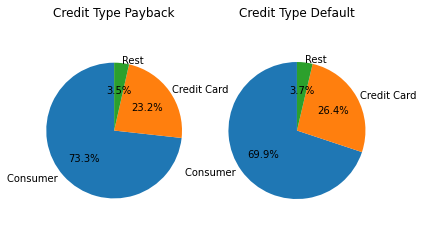

In [88]:
count = payback["CREDIT_TYPE"].value_counts()

N = len(payback["CREDIT_TYPE"])

consumer = count["Consumer credit"]
creditcard = count["Credit card"]
rest = N - consumer - creditcard

labels1 = "Consumer ", "Credit Card", "Rest"
sizes1 = [consumer/N, creditcard/N, rest/N]
title1 = "Credit Type Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default["CREDIT_TYPE"].value_counts()

N = len(default["CREDIT_TYPE"])

consumer = count["Consumer credit"]
creditcard = count["Credit card"]
rest = N - consumer - creditcard

labels2 = "Consumer ", "Credit Card", "Rest"
sizes2 = [consumer/N, creditcard/N, rest/N]
title2 = "Credit Type Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)

Kein Informationsgehalt in der Währung (99.92 % aller Kredite wurden in der gleichen Währung vergeben)

In [38]:
bureau["CREDIT_CURRENCY"].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [40]:
1715020 / len(bureau["CREDIT_CURRENCY"]) * 100

99.91796917785074

Zurückzahlende Kunden bezogen bereits durchschnittlich 3.17 Jahre zuvor einen anderen Kredit

Ausfallende Kunden bezogen bereits durchschnittlich 2.67 Jahre zuvor einen anderen Kredit

In [60]:
payback["DAYS_CREDIT"].mean()*-1/365

3.1724363103016247

In [61]:
default["DAYS_CREDIT"].mean()*-1/365

2.669776960655314

Zurückzahlende Kunden überzogen bereits durchschnittlich 1.05 Jahre zuvor einen anderen Kredit

Ausfallende Kunden überzogen bereits durchschnittlich 0.57 Jahre zuvor einen anderen Kredit

In [71]:
payback[payback["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].mean() / 365

1.0491144023176038

In [72]:
default[default["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].mean() / 365

0.5750299340436327

<AxesSubplot:xlabel='CREDIT_DAY_OVERDUE', ylabel='TARGET'>

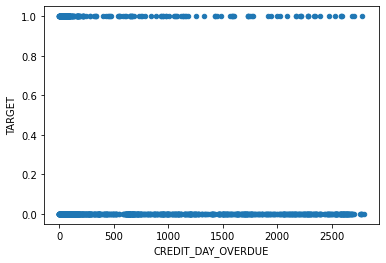

In [91]:
bureau[bureau["CREDIT_DAY_OVERDUE"] > 0][["CREDIT_DAY_OVERDUE","TARGET"]].plot.scatter(x = "CREDIT_DAY_OVERDUE", y = "TARGET")

<AxesSubplot:ylabel='Frequency'>

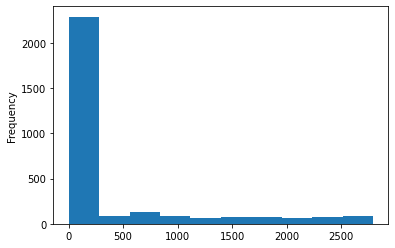

In [95]:
payback[payback["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

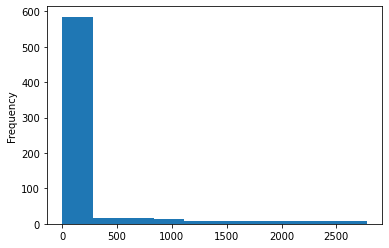

In [96]:
default[default["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].plot.hist()

Zurückzahlende Kunden hatten bereits durchschnittlich 465,329.86€ überzogen.

Ausfallende Kunden hatten bereits durchschnittlich 384,614.61€ überzogen.

In [103]:
payback[payback["AMT_CREDIT_SUM_DEBT"] > 0]["AMT_CREDIT_SUM_DEBT"].mean()

465329.8589330643

In [104]:
default[default["AMT_CREDIT_SUM_DEBT"] > 0]["AMT_CREDIT_SUM_DEBT"].mean()

384614.6111320284

CREDIT ACTIVE

In [8]:
payback["CREDIT_ACTIVE"].value_counts()

Closed      854124
Active      491583
Sold          5082
Bad debt        16
Name: CREDIT_ACTIVE, dtype: int64

In [9]:
default["CREDIT_ACTIVE"].value_counts()

Closed      63609
Active      50336
Sold          571
Bad debt        4
Name: CREDIT_ACTIVE, dtype: int64

### Payback

Closed      854124
Active      491583
Sold          5082
Bad debt        16
Name: CREDIT_ACTIVE, dtype: int64 



### Default

Closed      63609
Active      50336
Sold          571
Bad debt        4
Name: CREDIT_ACTIVE, dtype: int64 



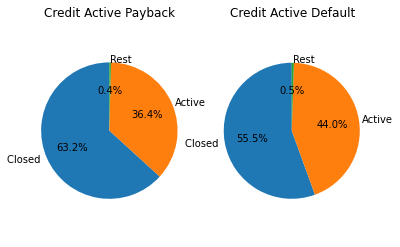

In [11]:
count = payback["CREDIT_ACTIVE"].value_counts()

N = len(payback["CREDIT_ACTIVE"])

closed = count["Closed"]
active = count["Active"]
rest = N - closed - active

labels1 = "Closed ", "Active", "Rest"
sizes1 = [closed/N, active/N, rest/N]
title1 = "Credit Active Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default["CREDIT_ACTIVE"].value_counts()

N = len(default["CREDIT_ACTIVE"])

closed = count["Closed"]
active = count["Active"]
rest = N - closed - active

labels2 = "Closed ", "Active", "Rest"
sizes2 = [closed/N, active/N, rest/N]
title2 = "Credit Active Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)